In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0,'..')

# Theta Performance Test

## Comping Options
(FASLH setup 1)

 Options  | Evolution [s] | Hydro [s] | RadTrans (+Gravity) [s]
 ---|---|---|---
 -O2 | 884.3 | 89.687 | 470.059 (+263.765)
 -O3 | 676.6 | 86.543 | 288.112 (+241.016)

* `-O3` is much faster! [GNU]

## Memory Modes
(FASLH setup 2)

 Options  | Evolution [s] | Hydro [s] | RadTrans (+Gravity) [s]
 ---|---|---|---
 Cache (d8j4) | 424.750 | 33.413 | 305.979 (+163.380)
      (d4j2) | 458.730 | 32.398 | 341.581 (+173.602)
 Flat (d8j4) | 425.704 | 35.413 | 305.304 (+161.757)
      (d4j2) | 460.214 | 34.709 | 340.850 (+172.845)

## 128 nodes + 50 steps

Speark3D+M1 + SFHo + mesa20 + 1 degree ang. resolution

8 ranks/node, 8 omp_threads, no hyper threading

In [2]:
j1_x = np.array([1024,4096])
j1_y = np.array([676.6,447.876])
j2_x = np.array([1024,2048,4096,8192])
j2_y = np.array([568.028, 467.799, 383.45, 521.854])
j4_x = np.array([2048, 4096, 8192])
j4_y = np.array([413.485, 357.184, 461.642])

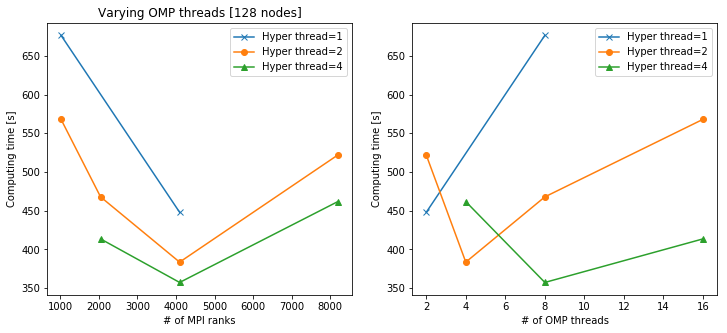

In [3]:
plt.figure(1,figsize=(12,5))
plt.subplot(121)
plt.title("Varying OMP threads [128 nodes]")
plt.plot(j1_x,j1_y,'x-',label="Hyper thread=1")
plt.plot(j2_x,j2_y,'o-',label="Hyper thread=2")
plt.plot(j4_x,j4_y,'^-',label="Hyper thread=4")
plt.xlabel("# of MPI ranks")
plt.ylabel("Computing time [s]")
plt.legend()
plt.subplot(122)
plt.plot((128*64)/j1_x,j1_y,'x-',label="Hyper thread=1")
plt.plot((128*2*64)/j2_x,j2_y,'o-',label="Hyper thread=2")
plt.plot((128*4*64)/j4_x,j4_y,'^-',label="Hyper thread=4")
plt.xlabel("# of OMP threads")
plt.ylabel("Computing time [s]")
plt.legend()
#plt.show()
plt.savefig('fig_theta_performance_n128.pdf')

* Scaling is not good with MPI ranks = 8192 (1 degree res.)
* Hyperthreading = 4 gives the best performance

## Performance test for the m15u setup

m15u6 model + SFHo + Spark3D. 0.6 degree agn. res.

In [4]:
n4096_x = [128, 256]
n4096_y = [727.889, 504.462]

n8192_x = [128,256,512]
n8192_y = [651.694, 424.745, 316.320]

n16384_x = [256, 512]
n16384_y = [432.130, 283.326]

n32768_x = [512]
n32768_y = [252.149]

In [5]:
o16_x = [128, 256, 512]
o16_y = [1039.768, 504.462, 316.320]

o8_x = [128,256,512]
o8_y = [727.889, 424.745, 283.326]

o4_x = [128, 256, 512]
o4_y = [651.694, 432.130, 252.149]

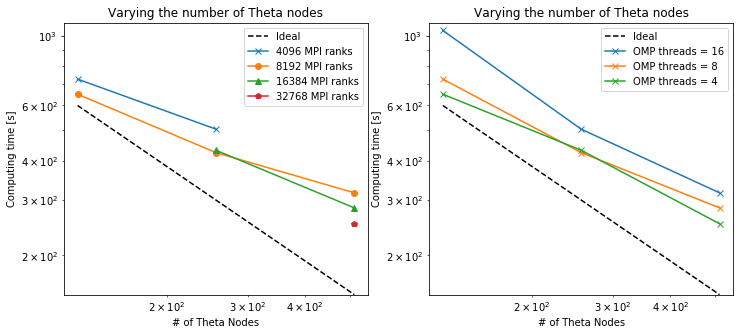

In [6]:
plt.figure(2,figsize=(12,5))
plt.subplot(121)
plt.title("Varying the number of Theta nodes")
plt.plot([128,256,512],[600,300,150],'k--',label="Ideal")
plt.plot(n4096_x,n4096_y,'x-',label="4096 MPI ranks")
plt.plot(n8192_x,n8192_y,'o-',label="8192 MPI ranks")
plt.plot(n16384_x,n16384_y,'^-',label="16384 MPI ranks")
plt.plot(n32768_x,n32768_y,'p-',label="32768 MPI ranks")
plt.xlabel("# of Theta Nodes")
plt.ylabel("Computing time [s]")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(150,1100)
plt.subplot(122)
plt.title("Varying the number of Theta nodes")
plt.plot([128,256,512],[600,300,150],'k--',label="Ideal")
plt.plot(o16_x,o16_y,'x-',label="OMP threads = 16")
plt.plot(o8_x,o8_y,'x-',label="OMP threads = 8")
plt.plot(o4_x,o4_y,'x-',label="OMP threads = 4")
plt.xlabel("# of Theta Nodes")
plt.ylabel("Computing time [s]")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(150,1100)
#plt.show()
plt.savefig('fig_theta_scaling_j4.pdf')

# Conclusions

* Intel compiler is somehow not working with the CoreCollapse/M1 problem on Theta
* Use `-O3`
* Use hyper threading `n_hyperthreads = 4`
* Use `n_omp_threads = 4` (or `8`).
* Will crash if `n_omp_threads=2`. The error is `OOM killer terminated this process.`
* The best MPI ranks is depends on the total number of blocks
* The `n256d8j4` run takes ~11 sec per timestep (dt=1.3e-6 s) with 256 nodes -> ~2.35 hr/mspb -> ~ 300 node-hours per milisecond postbouce -> 20,000 cpu-hours per ms postbounce
* 1M cpu-hours on Theta can only run ~ 50 ms postbounce

We have ~8.8M cpu-hours on Theta.